# **Data Preprocessing**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, LassoCV, LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The purpose of this file is to abstract away all preprocessing procedures like cleaning the data and dividing train and test sets.
# Run everything before you move on to your own coding potions.

# Please upload the dataset to your own drive's MLBA folder
df = pd.read_csv('/content/drive/MyDrive/MLBA/CLEAN_FIFA23_official_data.csv')

In [ ]:
# List all the columns before the preprocessing procedures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17660 non-null  int64  
 1   ID                        17660 non-null  int64  
 2   Name                      17660 non-null  object 
 3   Age                       17660 non-null  int64  
 4   Photo                     17660 non-null  object 
 5   Nationality               17660 non-null  object 
 6   Flag                      17660 non-null  object 
 7   Overall                   17660 non-null  int64  
 8   Potential                 17660 non-null  int64  
 9   Club                      17660 non-null  object 
 10  Club Logo                 17660 non-null  object 
 11  Value(£)                  17660 non-null  float64
 12  Wage(£)                   17660 non-null  float64
 13  Special                   17660 non-null  int64  
 14  Prefer

In [ ]:
# Drop columns that contains unnecessary information
df.drop(labels=["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag", "Club", "Club Logo", "Real Face", "Joined", "Loaned From", "Contract Valid Until", "Height(cm.)", "Weight(lbs.)", "Release Clause(£)", "Kit Number", "Best Overall Rating", "Year_Joined"], axis=1, inplace=True)

In [ ]:
# Counting the number of cells with '0' in all columns
zero_count_per_column = (df == 0).sum()
print(zero_count_per_column)

Age                           0
Overall                       0
Potential                     0
Value(£)                    283
Wage(£)                     270
Special                       0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                     0
Position                      0
dtype: int64


In [ ]:
# Replace '0' with NaN
df.replace(0, np.nan, inplace=True)

# Drop rows with NaN values (which were originally '0's)
df.dropna(inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
# check progress, can be deleted later
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17376 entries, 0 to 17375
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17376 non-null  int64  
 1   Overall                   17376 non-null  int64  
 2   Potential                 17376 non-null  int64  
 3   Value(£)                  17376 non-null  float64
 4   Wage(£)                   17376 non-null  float64
 5   Special                   17376 non-null  int64  
 6   Preferred Foot            17376 non-null  object 
 7   International Reputation  17376 non-null  float64
 8   Weak Foot                 17376 non-null  float64
 9   Skill Moves               17376 non-null  float64
 10  Work Rate                 17376 non-null  object 
 11  Body Type                 17376 non-null  object 
 12  Position                  17376 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 1.7+ MB


In [ ]:
# Print unique values for 'Preferred Foot'
print("Unique values in 'Preferred Foot':")
print(df['Preferred Foot'].unique())

# Print unique values for 'Work Rate'
print("\nUnique values in 'Work Rate':")
print(df['Work Rate'].unique())

# Print unique values for 'Body Type'
print("\nUnique values in 'Body Type':")
print(df['Body Type'].unique())

# Print unique values for 'Position'
print("\nUnique values in 'Position':")
print(df['Position'].unique())


Unique values in 'Preferred Foot':
['Right' 'Left']

Unique values in 'Work Rate':
['High/ Medium' 'High/ High' 'Medium/ Medium' 'Medium/ High' 'High/ Low'
 'Low/ Low' 'Low/ High' 'Medium/ Low' 'Low/ Medium']

Unique values in 'Body Type':
['Unique' 'Stocky (170-185)' 'Normal (170-)' 'Normal (170-185)'
 'Stocky (185+)' 'Lean (185+)' 'Lean (170-185)' 'Normal (185+)'
 'Lean (170-)' 'Stocky (170-)']

Unique values in 'Position':
['SUB' 'LCM' 'LB' 'RCM' 'RDM' 'LCB' 'RS' 'RB' 'LM' 'LS' 'RWB' 'CDM' 'RW'
 'RM' 'LF' 'LWB' 'ST' 'CAM' 'LDM' 'RES' 'LW' 'CF' 'RF' 'RCB' 'CM' 'CB'
 'RAM' 'LAM' 'GK']


In [ ]:
# Define the mapping from specific positions to broader categories
position_mapping = {
    'GK': 'Goalkeeper',
    'LB': 'Defender', 'LCB': 'Defender', 'CB': 'Defender', 'RCB': 'Defender', 'RB': 'Defender', 'RWB': 'Defender', 'LWB': 'Defender',
    'LCM': 'Mid-fielder', 'RCM': 'Mid-fielder', 'LDM': 'Mid-fielder', 'RDM': 'Mid-fielder', 'CDM': 'Mid-fielder', 'CM': 'Mid-fielder', 'RAM': 'Mid-fielder', 'LAM': 'Mid-fielder', 'CAM': 'Mid-fielder', 'LM': 'Mid-fielder', 'RM': 'Mid-fielder',
    'LS': 'Attacker', 'RS': 'Attacker', 'LW': 'Attacker', 'RW': 'Attacker', 'LF': 'Attacker', 'RF': 'Attacker', 'CF': 'Attacker', 'ST': 'Attacker',
    'SUB': 'Substitute', 'RES': 'Reserve'
}

# Create a new column for the categorized positions
df['Position Category'] = df['Position'].map(position_mapping)

# Check the first few entries to verify
print(df[['Position', 'Position Category']].head())

  Position Position Category
0      SUB        Substitute
1      LCM       Mid-fielder
2       LB          Defender
3      RCM       Mid-fielder
4      RCM       Mid-fielder


In [ ]:
# Convert categorical data into dummy variables for 'Preferred Foot', 'Work Rate', 'Body Type', 'Position'
PreferredFoot_dummies = pd.get_dummies(df['Preferred Foot'], drop_first=True)
WorkRate_dummies = pd.get_dummies(df['Work Rate'], drop_first=True)
BodyType_dummies = pd.get_dummies(df['Body Type'], drop_first=True)
PositionCategory_dummies = pd.get_dummies(df['Position Category'], drop_first=True)

# Drop the original columns
df.drop(labels=['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Position Category'], axis=1, inplace=True)

# Join the dummy variables to the DataFrame
df = df.join([PreferredFoot_dummies, WorkRate_dummies, BodyType_dummies, PositionCategory_dummies])

In [ ]:
# List all the columns after the preprocessing procedures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17376 entries, 0 to 17375
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17376 non-null  int64  
 1   Overall                   17376 non-null  int64  
 2   Potential                 17376 non-null  int64  
 3   Value(£)                  17376 non-null  float64
 4   Wage(£)                   17376 non-null  float64
 5   Special                   17376 non-null  int64  
 6   International Reputation  17376 non-null  float64
 7   Weak Foot                 17376 non-null  float64
 8   Skill Moves               17376 non-null  float64
 9   Right                     17376 non-null  uint8  
 10  High/ Low                 17376 non-null  uint8  
 11  High/ Medium              17376 non-null  uint8  
 12  Low/ High                 17376 non-null  uint8  
 13  Low/ Low                  17376 non-null  uint8  
 14  Low/ M

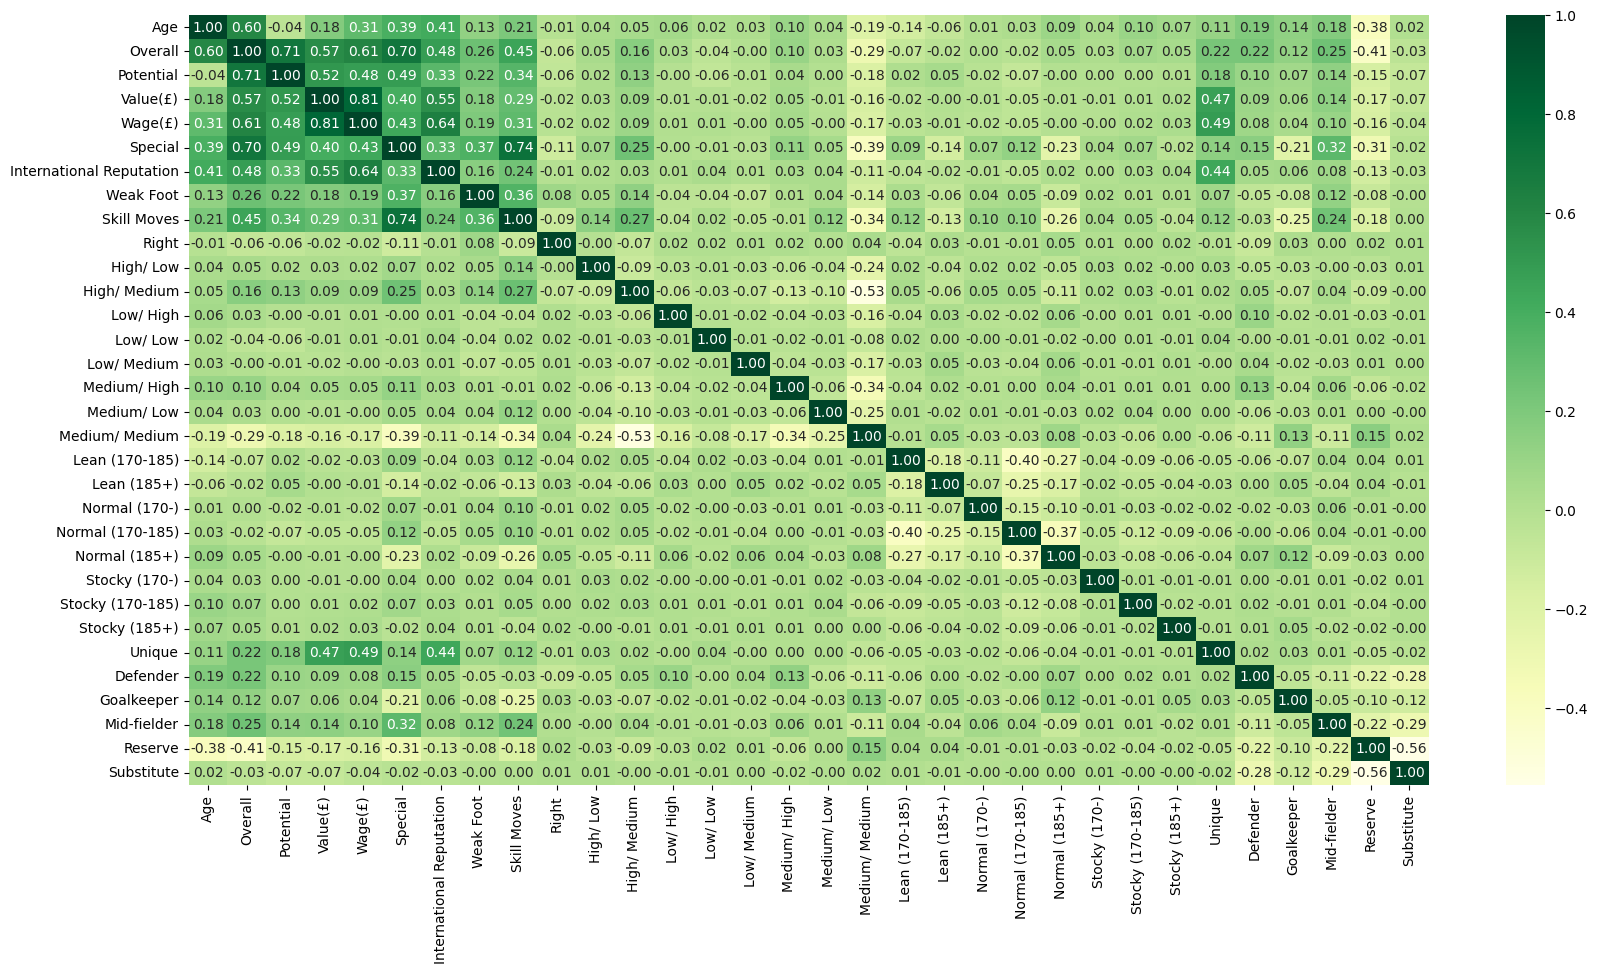

In [ ]:
#create correlation table
correlation_table = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_table, cmap='YlGn', annot=True, fmt=".2f")

# Display the plot
plt.show()

In [ ]:
# Split the data into train and test files
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print(df_train.shape, df_test.shape)

(13900, 32) (3476, 32)


In [ ]:
# Save the training and testing sets as CSV files into MyDrive/MLBA
df_train.to_csv('/content/drive/MyDrive/MLBA/FIFA_train_set.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/MLBA/FIFA_test_set.csv', index=False)

In [ ]:
# Now there should be two files, FIFA_train_set.csv and FIFA_test_set.csv, in your MLBA folder :D

# **Loading Test and Train**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/MLBA/FIFA_train_set.csv')
df_test = pd.read_csv('/content/drive/MyDrive/MLBA/FIFA_test_set.csv')

df_train.head()

,Age,Overall,Potential,Value(£),Wage(£),Special,International Reputation,Weak Foot,Skill Moves,Right,...,Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique,Defender,Goalkeeper,Mid-fielder,Reserve,Substitute
0,21,55,63,275000.0,3000.0,1533,1.0,3.0,2.0,1,...,0,0,0,0,0,0,0,0,1,0
1,28,72,72,2100000.0,21000.0,1861,1.0,3.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,24,65,69,1000000.0,7000.0,1661,1.0,4.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1
3,25,67,73,1400000.0,2000.0,1406,1.0,2.0,2.0,1,...,1,0,0,0,0,0,0,0,0,1
4,30,80,80,20000000.0,56000.0,2059,2.0,3.0,4.0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train = df_train.drop('Potential', axis=1)
X_test = df_test.drop('Potential', axis=1)
y_train = df_train['Potential']
y_test = df_test['Potential']

X_train.head()

,Age,Overall,Value(£),Wage(£),Special,International Reputation,Weak Foot,Skill Moves,Right,High/ Low,...,Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique,Defender,Goalkeeper,Mid-fielder,Reserve,Substitute
0,21,55,275000.0,3000.0,1533,1.0,3.0,2.0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,28,72,2100000.0,21000.0,1861,1.0,3.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,24,65,1000000.0,7000.0,1661,1.0,4.0,3.0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,25,67,1400000.0,2000.0,1406,1.0,2.0,2.0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,30,80,20000000.0,56000.0,2059,2.0,3.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,1


# **Descriptive Analysis**

In [ ]:
for feature in X_train:
  data = X_train[feature]
  print("FEATURE: {}\n MIN: {}\n MAX: {}\n MEAN: {}\n MEDIAN: {}\n STD DEV: {}\n VAR: {}".format(feature, np.min(data), np.max(data), np.mean(data).round(3), np.median(data), np.std(data).round(3), np.var(data).round(3)))

FEATURE: Age
 MIN: 16
 MAX: 44
 MEAN: 23.04
 MEDIAN: 22.0
 STD DEV: 4.55
 VAR: 20.703
FEATURE: Overall
 MIN: 44
 MAX: 91
 MEAN: 63.289
 MEDIAN: 63.0
 STD DEV: 7.998
 VAR: 63.969
FEATURE: Value(£)
 MIN: 1000.0
 MAX: 190500000.0
 MEAN: 2747018.417
 MEDIAN: 725000.0
 STD DEV: 7733822.72
 VAR: 59812013871027.72
FEATURE: Wage(£)
 MIN: 500.0
 MAX: 450000.0
 MEAN: 8190.076
 MEDIAN: 2000.0
 STD DEV: 19894.192
 VAR: 395778893.052
FEATURE: Special
 MIN: 749
 MAX: 2312
 MEAN: 1537.055
 MEDIAN: 1548.0
 STD DEV: 285.77
 VAR: 81664.763
FEATURE: International Reputation
 MIN: 1.0
 MAX: 5.0
 MEAN: 1.1
 MEDIAN: 1.0
 STD DEV: 0.392
 VAR: 0.154
FEATURE: Weak Foot
 MIN: 1.0
 MAX: 5.0
 MEAN: 2.892
 MEDIAN: 3.0
 STD DEV: 0.663
 VAR: 0.44
FEATURE: Skill Moves
 MIN: 1.0
 MAX: 5.0
 MEAN: 2.3
 MEDIAN: 2.0
 STD DEV: 0.749
 VAR: 0.561
FEATURE: Right
 MIN: 0
 MAX: 1
 MEAN: 0.772
 MEDIAN: 1.0
 STD DEV: 0.419
 VAR: 0.176
FEATURE: High/ Low
 MIN: 0
 MAX: 1
 MEAN: 0.039
 MEDIAN: 0.0
 STD DEV: 0.195
 VAR: 0.038
FEATURE

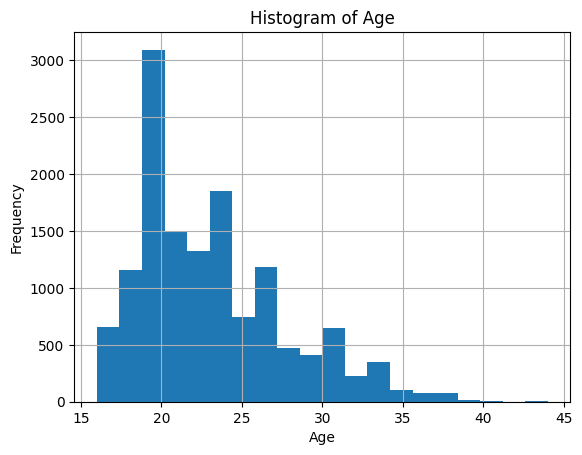

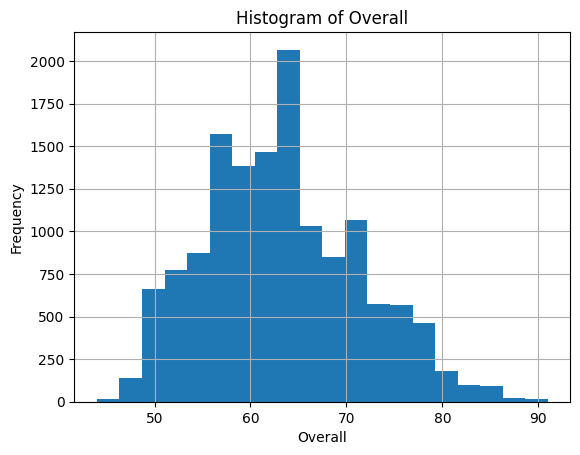

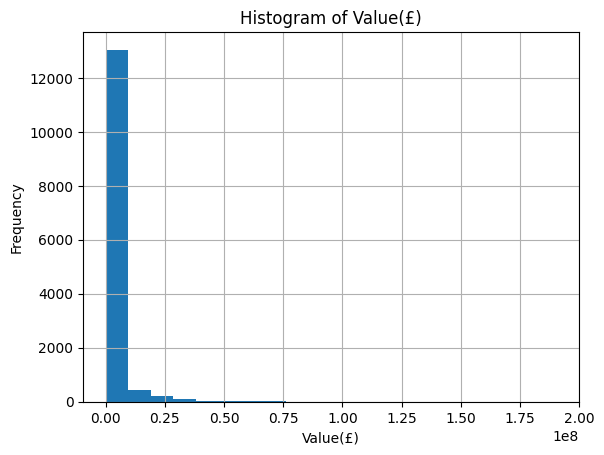

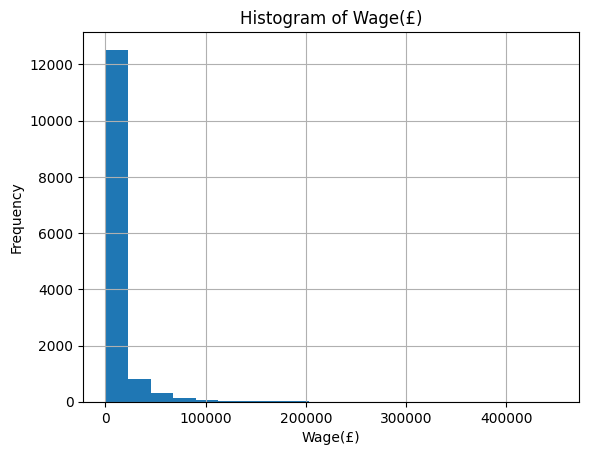

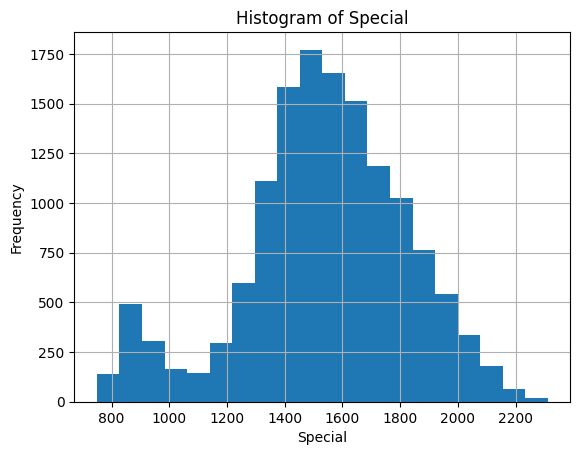

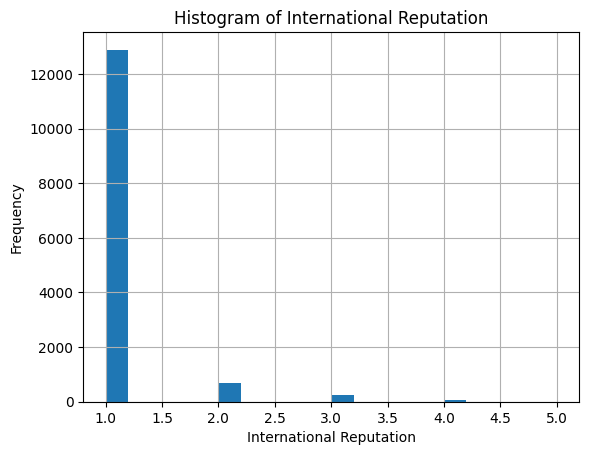

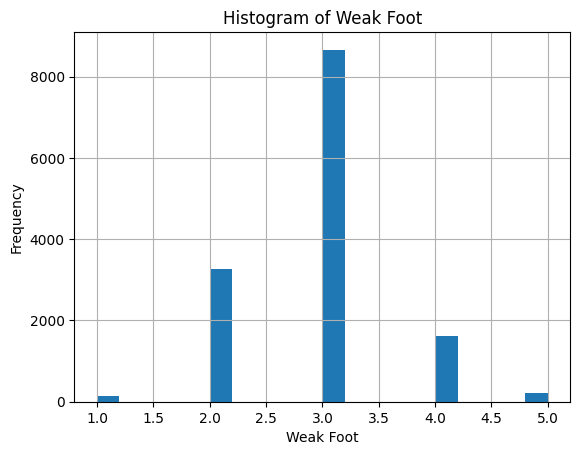

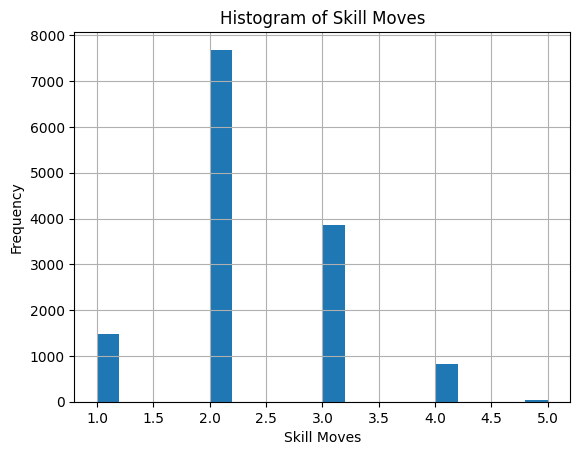

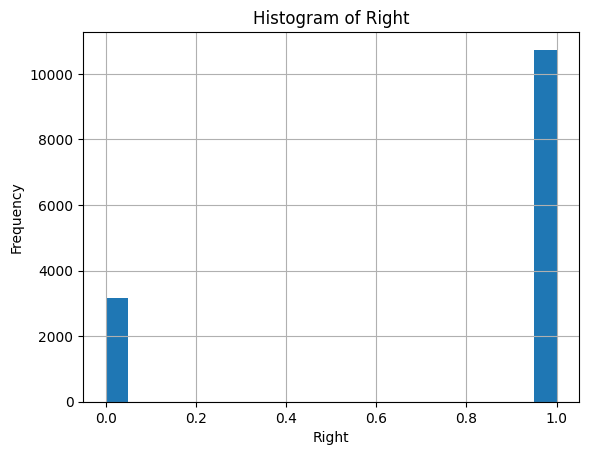

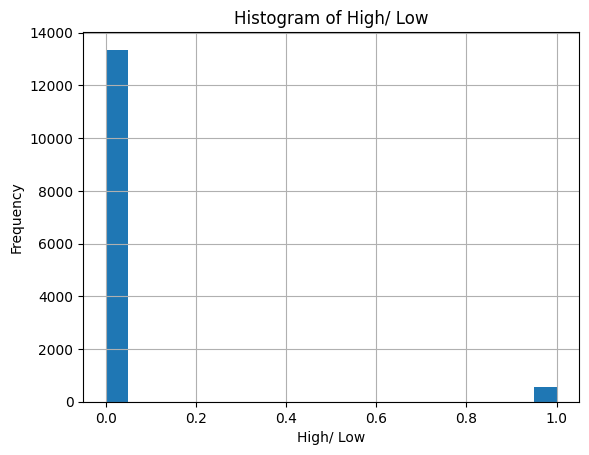

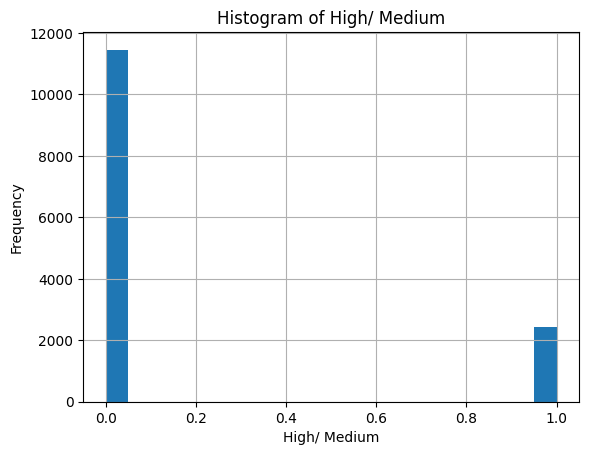

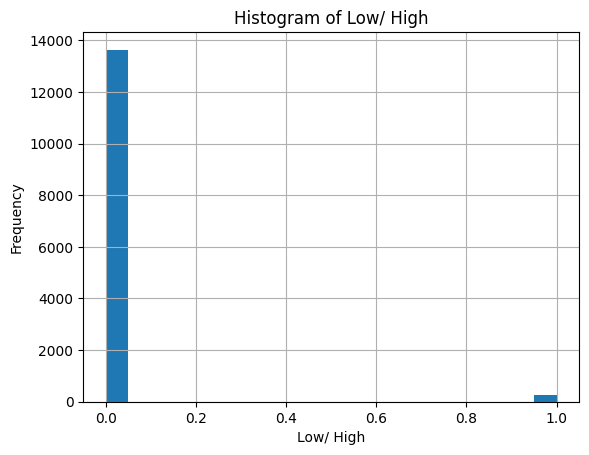

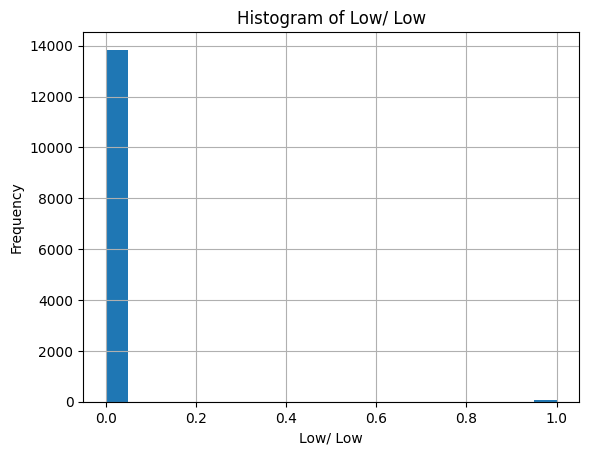

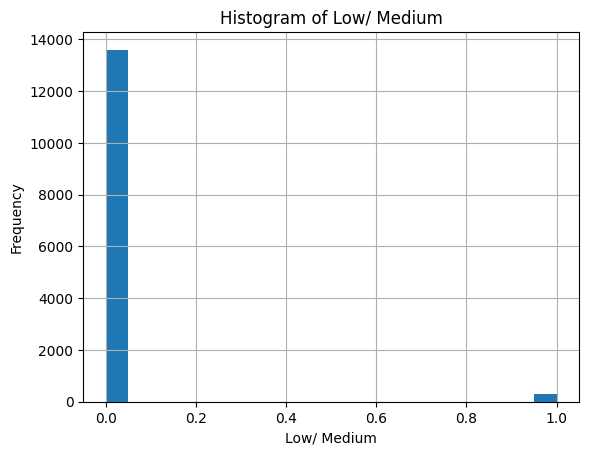

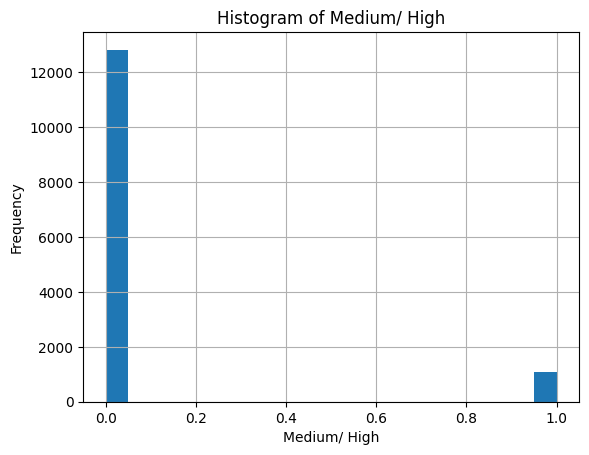

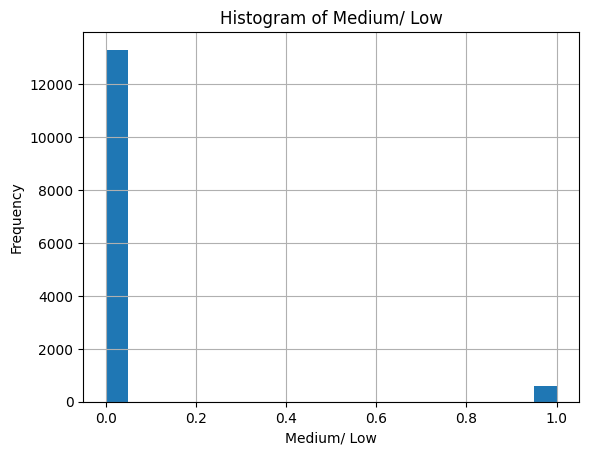

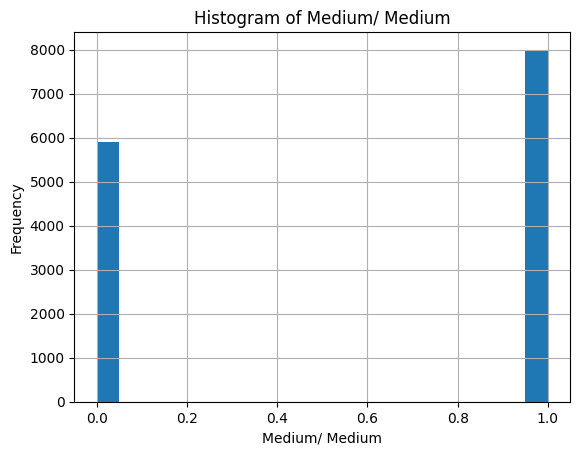

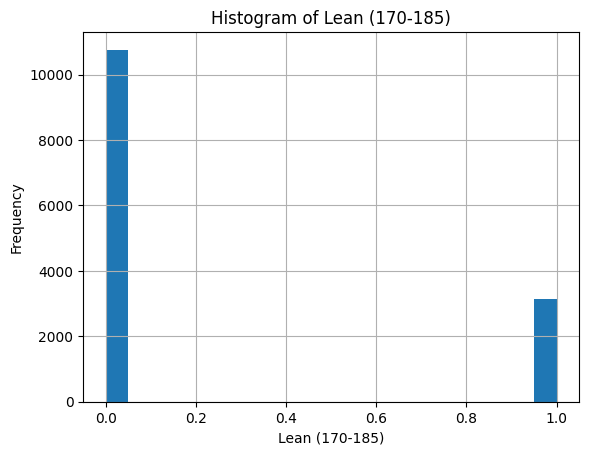

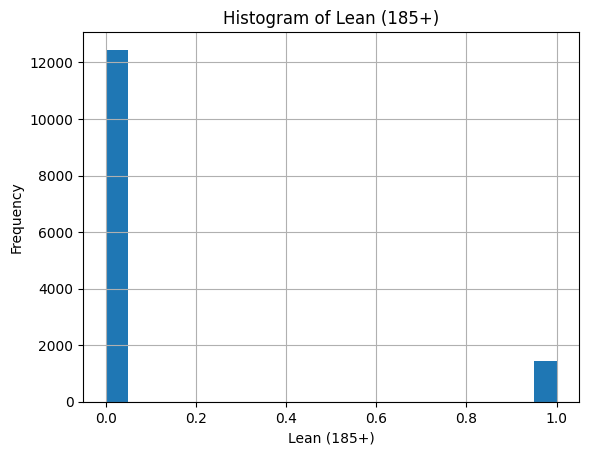

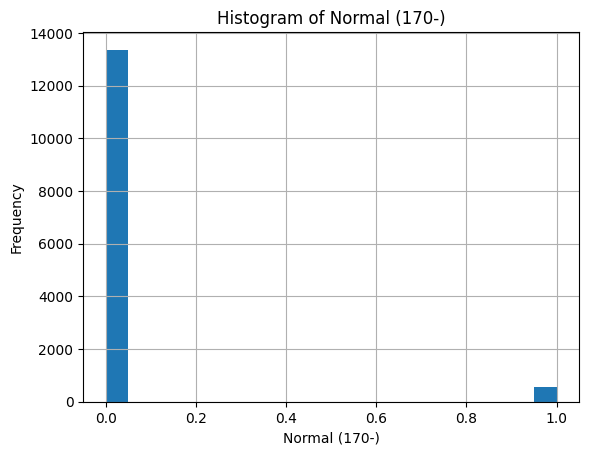

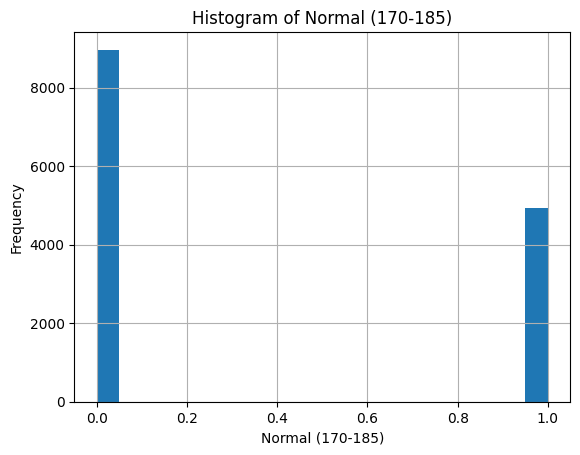

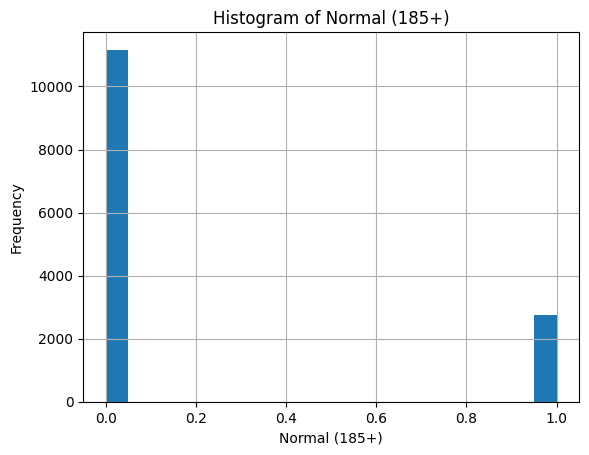

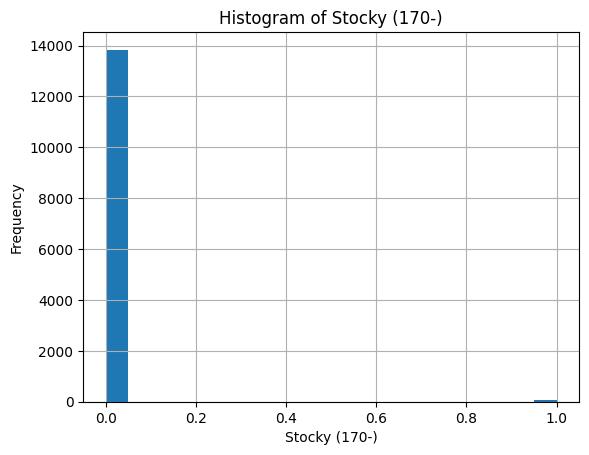

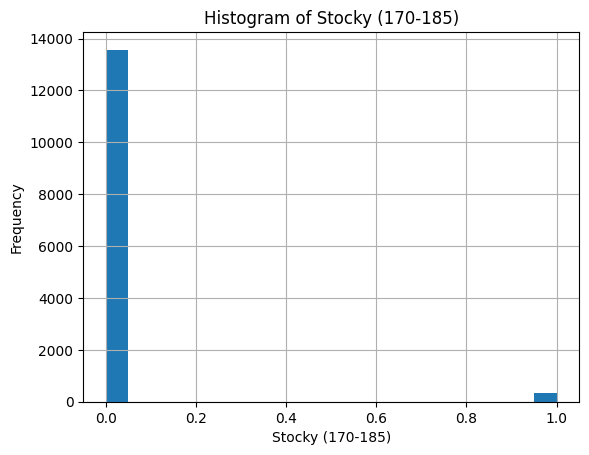

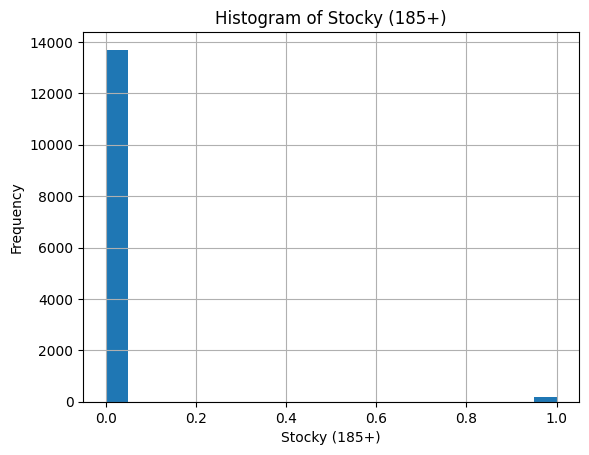

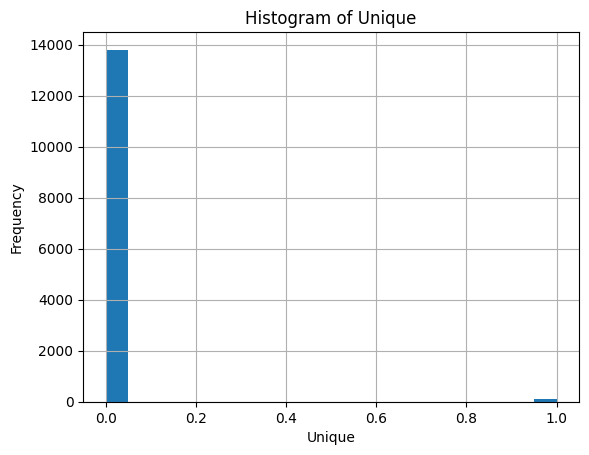

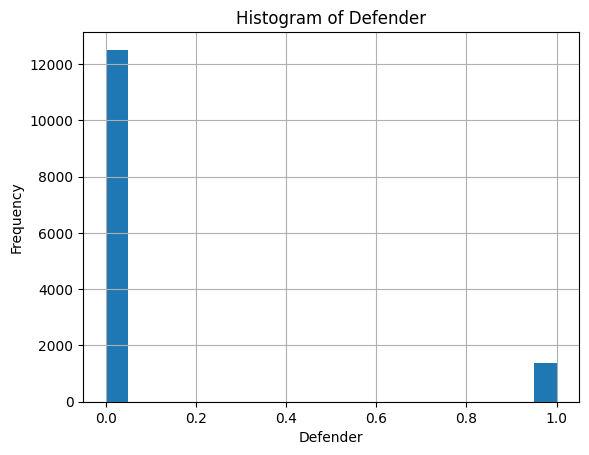

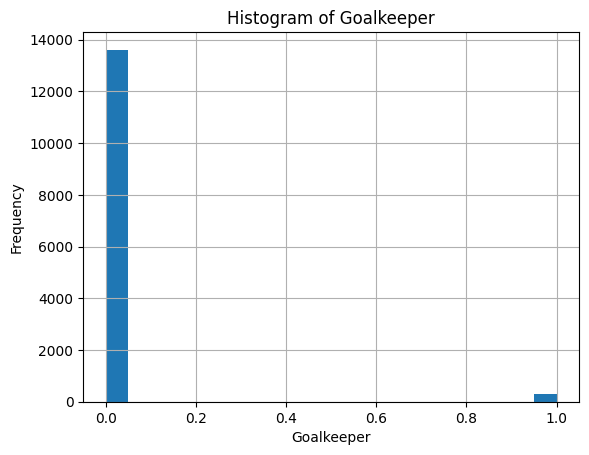

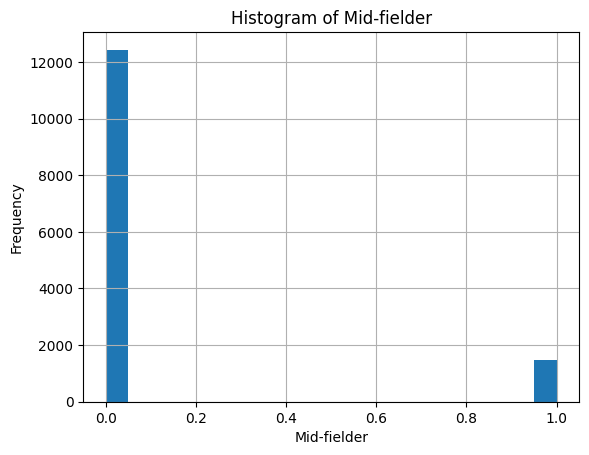

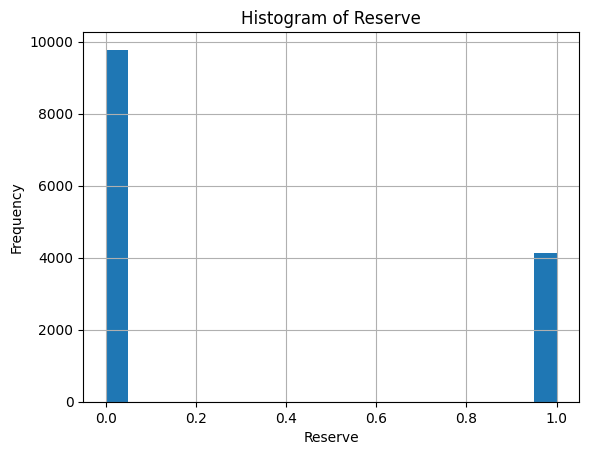

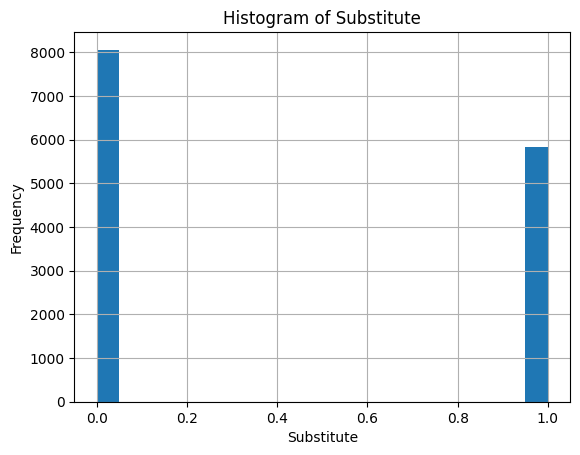

In [ ]:
for feature in X_train.columns:
  plt.figure()
  X_train[feature].hist(bins=20)
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

# **Naive Model**

In [ ]:
#NAIVE

# Calculate the mean of y_train
yhat = y_train.mean()

# Naive predictions
yhat_train = np.ones_like(y_train) * yhat
yhat_test = np.ones_like(y_test) * yhat

# Calculate mean squared error
mse_train = mean_squared_error(y_train, yhat_train)
mse_test = mean_squared_error(y_test, yhat_test)

# Calculate mean absolute error
mae_train = mean_absolute_error(y_train, yhat_train)
mae_test = mean_absolute_error(y_test, yhat_test)

# Print results
print(f'Training MAE: {mae_train}')
print(f'Testing MAE: {mae_test}')
# Print results
print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')

Training MAE: 5.168881113813986
Testing MAE: 5.2453104949872085
Training MSE: 42.40134373997205
Testing MSE: 43.51290649390299


# **Linear Regression**

In [ ]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression(fit_intercept=True) # 1. instantiate model
model.fit(X_train_scaled, y_train) # 2. fit model to data

model.coef_, model.intercept_

(array([-4.80182608e+00,  7.66000529e+00, -4.20522509e-01, -3.55626727e-02,
        -2.95698336e-01,  7.95686912e-01,  1.22446622e-01,  1.21624030e-02,
        -1.66743772e-02,  3.00546929e-02,  1.22178730e-02,  6.47043358e-02,
        -5.99293485e-02,  3.76842399e-02,  4.69247711e-02, -1.76243064e-02,
         5.15040652e-02,  7.51484968e-02,  8.74539821e-02, -3.91538245e-02,
        -8.58780577e-02, -2.58345308e-02, -2.56209143e-03, -2.76517308e-02,
        -1.11681416e-02, -3.23027554e-02,  2.02927698e-02,  9.96142152e-02,
        -9.93718272e-03,  3.68294599e-01,  8.29289957e-02]),
 70.94417266187051)

In [ ]:
y_train_fit_lin = model.predict(X_train_scaled)              # predict on training data

y_pred_lin = model.predict(X_test_scaled)               # predict on test data

mse_train = mean_squared_error(y_train, y_train_fit_lin)
mse_test = mean_squared_error(y_test, y_pred_lin)
print(f'Training RMSE: {np.sqrt(mse_train)}, Training MSE: {mse_train}')
print(f'Testing RMSE: {np.sqrt(mse_test)}, Testing MSE: {mse_test}')

Training RMSE: 2.6424957506679183, Training MSE: 6.982783792298005
Testing RMSE: 2.672136917082917, Testing MSE: 7.140315703637394


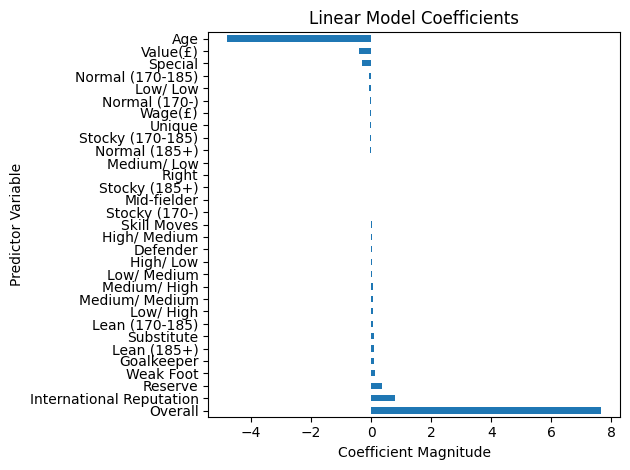

In [ ]:
# Mapping the coefficients)
coefs = pd.Series(model.coef_, index=X_train.columns)
coefs = coefs.sort_values(ascending=False)

fig, ax = plt.subplots()

# Plot vertical bars
coefs.plot(kind='barh')

ax.set_title("Linear Model Coefficients")
ax.set_xlabel("Coefficient Magnitude")
ax.set_ylabel("Predictor Variable")

# Remove value labels on bars
ax.set_yticklabels(coefs.index)

plt.tight_layout()
plt.show()

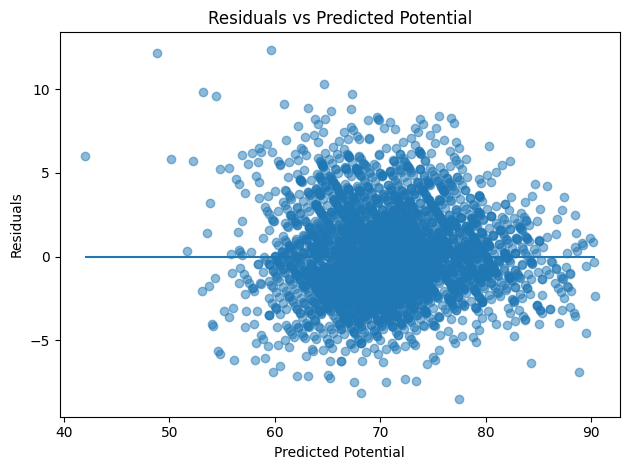

In [ ]:
# Calculate residuals
y_pred_test = model.predict(X_test_scaled)
residuals = y_test - y_pred_test

# scatter plot
plt.scatter(y_pred_test, residuals, alpha=0.5)

# add labels
plt.hlines(y = 0, xmin=y_pred_test.min(), xmax=y_pred_test.max())
plt.xlabel('Predicted Potential')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Potential')

plt.tight_layout()
plt.show()

# **Lasso**


In [ ]:
# Lasso Regression with Cross-Validation for Alpha
lasso_cv = LassoCV(alphas=None, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha
best_alpha_lasso = lasso_cv.alpha_
print(f"Best alpha: {best_alpha_lasso:.4f}")

# Fit the model with the best alpha
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train_scaled, y_train)

#calculate the MSE test
y_test_fit_lasso = lasso.predict(X_test_scaled)
mse_test_lasso = mean_squared_error(y_test, y_test_fit_lasso)

#, lasso.coef_
print(np.sqrt(mse_test_lasso), mse_test_lasso)

#print in 4 decimal place
print(" 4 dec place")
# [{', '.join(f'{coef:.4f}' for coef in lasso.coef_)}]
print(f"{np.sqrt(mse_test_lasso):.4f}, {mse_test_lasso:.4f}")

Best alpha: 0.0046
2.6716591428910834 7.137762575793519
 4 dec place
2.6717, 7.1378


Root Mean Squared Error (RMSE): 2.6717, Mean Squared Error (MSE): 7.1378


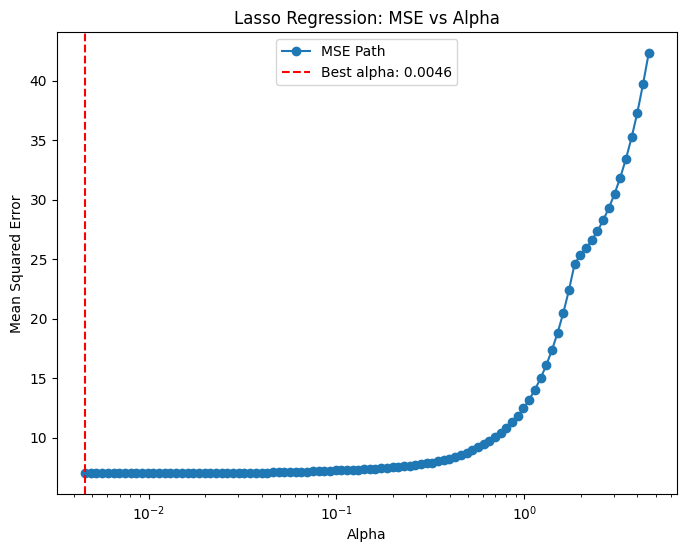

In [ ]:
# Print in 4 decimal places
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse_test_lasso):.4f}, Mean Squared Error (MSE): {mse_test_lasso:.4f}")

# Graphing the MSE against different alpha values
alphas_lasso = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_.mean(axis=1)

#graphing
plt.figure(figsize=(8, 6))
plt.plot(alphas_lasso, mse_path, marker='o', label ='MSE Path')
plt.axvline(best_alpha_lasso, color='r', linestyle='--', label=f'Best alpha: {best_alpha_lasso:.4f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: MSE vs Alpha')
plt.legend()
plt.show()

In [ ]:
#Elastic Net for the Lasso

# elnet = ElasticNet(l1_ratio=0.9)
# Define a range of l1_ratio values to try

l1_ratios = np.linspace(0.1, 1, 10)  # Adjust this range based on your needs

# Elastic Net with Cross-Validation
elnet_cv = ElasticNetCV(l1_ratio=l1_ratios, cv=5)
elnet_cv.fit(X_train_scaled, y_train)

# Best l1_ratio and alpha
best_l1_ratio = elnet_cv.l1_ratio_
best_alpha = elnet_cv.alpha_
print(f"Best l1_ratio: {best_l1_ratio:.4f}, Best alpha: {best_alpha:.4f}")

# Using the best l1_ratio and alpha to fit Elastic Net
elnet = ElasticNet(l1_ratio=best_l1_ratio, alpha=best_alpha)
elnet.fit(X_train_scaled, y_train)
y_test_fit_elnet = elnet.predict(X_test_scaled)
mse_test_elnet = np.mean((y_test - y_test_fit_elnet)**2)
print(f"Root MSE: {np.sqrt(mse_test_elnet):.4f}, MSE: {mse_test_elnet:.4f}")

# y_test_fit_elnet = elnet.predict(X_test_scaled)
# mse_test_elnet = np.mean( (y_test - y_test_fit_elnet)**2)
# print(np.sqrt(mse_test_elnet), mse_test_elnet)

Best l1_ratio: 1.0000, Best alpha: 0.0046
Root MSE: 2.6717, MSE: 7.1378


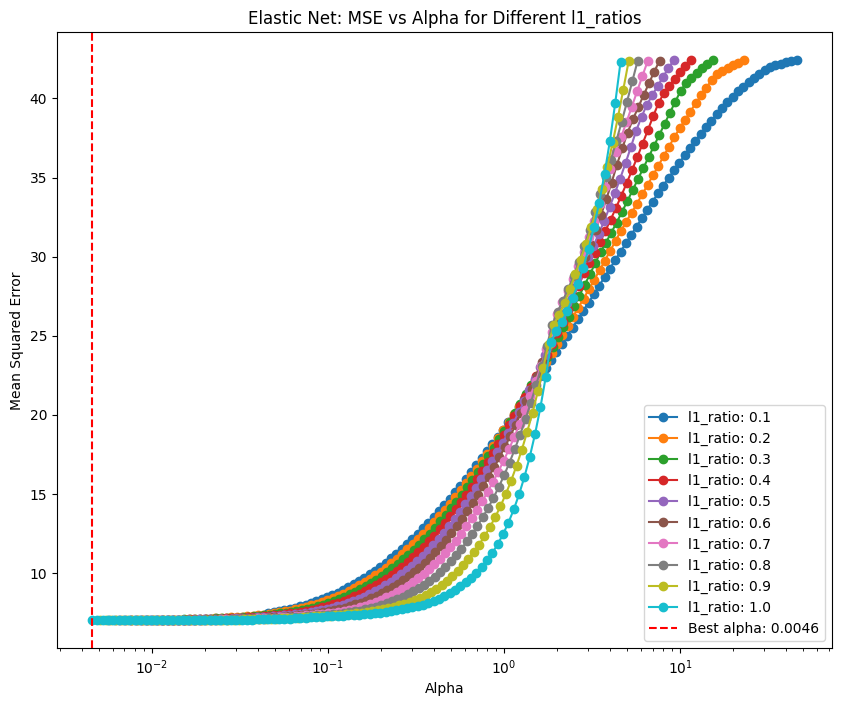

In [ ]:
#graph

# Graphing the MSE against different l1_ratio and alpha values
mse_path = elnet_cv.mse_path_.mean(axis=2)  # Mean MSE for each l1_ratio
alphas = elnet_cv.alphas_  # Alphas used for each l1_ratio

#graphing
plt.figure(figsize=(10, 8))
for i, l1_ratio in enumerate(l1_ratios):
    plt.plot(alphas[i], mse_path[i], marker='o', label=f'l1_ratio: {l1_ratio:.1f}')

plt.axvline(best_alpha, color='r', linestyle='--', label=f'Best alpha: {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Net: MSE vs Alpha for Different l1_ratios')
plt.legend()
plt.show()

# **Ridge**

In [ ]:
model = LinearRegression(fit_intercept=True)      # instantiate linear model
model.fit(X_train, y_train)                      # fit model to data

model.coef_, model.intercept_

(array([-1.05532877e+00,  9.57729258e-01, -5.43744701e-08, -1.78759067e-06,
        -1.03474069e-03,  2.02987568e+00,  1.84672035e-01,  1.62328953e-02,
        -3.97671927e-02,  1.54441373e-01,  3.20954378e-02,  4.75797543e-01,
        -9.14135735e-01,  2.61032987e-01,  1.75739426e-01, -8.77048781e-02,
         1.04204221e-01,  1.79767496e-01,  2.86279700e-01, -2.02264016e-01,
        -1.79464391e-01, -6.49841360e-02, -3.75546020e-02, -1.81900229e-01,
        -9.33235922e-02, -3.86073791e-01,  6.75777918e-02,  6.98139450e-01,
        -3.23426091e-02,  8.06250925e-01,  1.68022624e-01]),
 33.229624678983996)

In [ ]:
#predict on training data, evaluate
y_train_pred_regression = model.predict(X_train)              #predict on training data
mse_train_regression = mean_squared_error(y_train, y_train_pred_regression)

# 4b. predict on test data, evaluate
y_test_pred_regression = model.predict(X_test)                #predict on test data
mse_test_regression = mean_squared_error(y_test, y_test_pred_regression)

print(mse_train_regression, mse_test_regression)

6.982783792298008 7.1403157037186835


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled_ridge = scaler.fit_transform(X_train)
X_test_scaled_ridge = scaler.transform(X_test)

num_alphas = 200
alphas = np.logspace(-5, 5, num_alphas)

# Lasso Regression with Cross-Validation for Alpha
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled_ridge, y_train)

# Best alpha
best_alpha = ridge_cv.alpha_

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled_ridge, y_train)

#calculate the MSE test
y_test_fit_ridge = ridge.predict(X_test_scaled_ridge)
mse_test_ridge = np.mean( (y_test - y_test_fit_ridge)**2)

print("MSE sqrt:", np.sqrt(mse_test_ridge), "MSE:", mse_test_ridge)

#print in 4 decimal place
print(" 4 dec place")
# [{', '.join(f'{coef:.4f}' for coef in lasso.coef_)}]
print(f"{np.sqrt(mse_test_ridge):.4f}, {mse_test_ridge:.4f}")

MSE sqrt: 2.6719389421080124 MSE: 7.1392577103532835
 4 dec place
2.6719, 7.1393


# **KNN**

In [ ]:
# KNN Model - Trying with k = 5 as a default

# Training the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the model
default_k_mse_knn = mean_squared_error(y_test, y_pred_knn)
default_k_mse_knn

12.098101265822784

In [ ]:
# KNN Model - Optimize k with GridSearchCV

k_values_knn = [i for i in range (1,31)]
mses_knn = []

# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid_knn = {'n_neighbors': k_values_knn}

# Set up GridSearchCV
knn_gscv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')

# Fit the model
knn_gscv.fit(X_train, y_train)

# Find the best parameter
best_k_knn = knn_gscv.best_params_['n_neighbors']

# Use the best parameter to initialize the final model
knn_optimized = KNeighborsRegressor(n_neighbors=best_k_knn)
knn_optimized.fit(X_train, y_train)

# Predict and evaluate
y_pred_optimized_knn = knn_optimized.predict(X_test)
optimized_k_mse_knn = mean_squared_error(y_test, y_pred_optimized_knn)

print("Optimal k:", best_k_knn, "Minimum MSE:", optimized_k_mse_knn)

Optimal k: 17 Minimum MSE: 11.508507173261236


In [ ]:
# KNN Model - Comparing default k (5) with optimized k

print("default_k_mse", default_k_mse_knn)
print("optimized_k_mse", optimized_k_mse_knn)

default_k_mse 12.098101265822784
optimized_k_mse 11.508507173261236


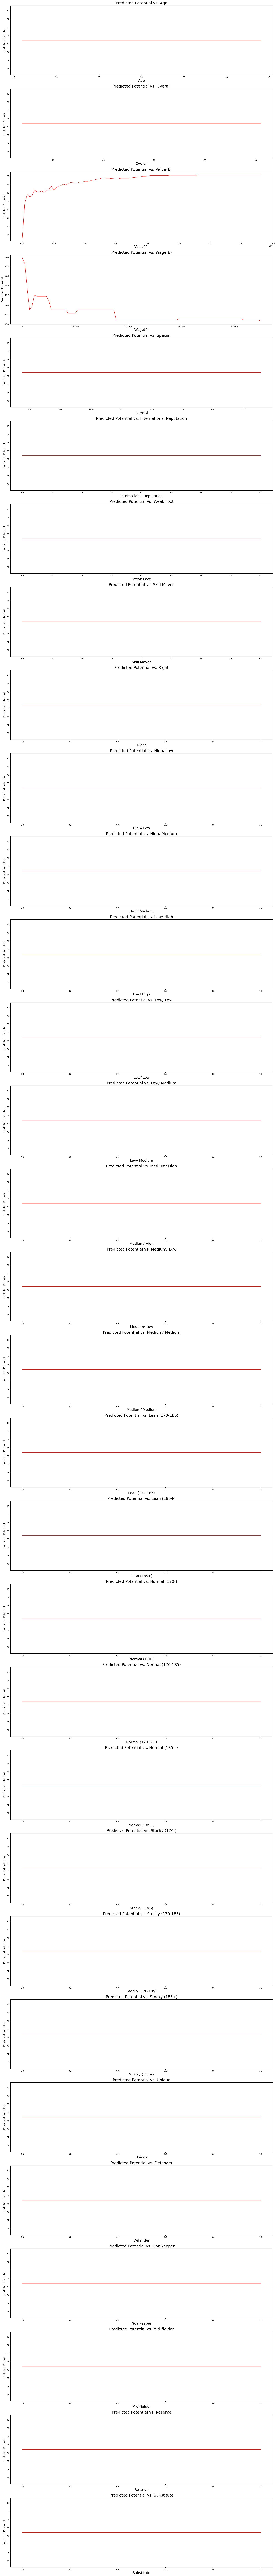

In [ ]:
# KNN Model - Visualizing the relationship between features and 'Potential' WITH KNN

# Compute the mean values of the features
mean_features_knn = np.mean(X_train, axis=0)

fig, axes = plt.subplots(len(X_train.columns), 1, figsize=(20, 6*len(X_train.columns)))

for i, feature in enumerate(X_train.columns):
    feature_data = X_train[feature]

    # Generating a range of values for the feature
    feature_min = feature_data.min()
    feature_max = feature_data.max()
    feature_range = np.linspace(feature_min, feature_max, 100)

    # Create a DataFrame where this feature varies and others are constant
    feature_data = pd.DataFrame(np.tile(mean_features_knn, (len(feature_range), 1)), columns=X_train.columns)
    feature_data[feature] = feature_range

    # Predict potential for this range of feature values
    predicted_potential_knn = knn_gscv.predict(feature_data)

    axes[i].plot(feature_range, predicted_potential_knn, color='red')
    axes[i].set_title(f'Predicted Potential vs. {feature}', fontsize=20)
    axes[i].set_xlabel(feature, fontsize=18)
    axes[i].set_ylabel('Predicted Potential', fontsize=14)


plt.tight_layout()
plt.show()


# **Decison Tree**

In [ ]:
# simple decision tree

#set the random state, number of estimator
random_state = 42

# Train Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=random_state, ccp_alpha=3)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_hat_pred = decision_tree.predict(X_test)

# Make predictions on the training set
y_train_pred = decision_tree.predict(X_train)

In [ ]:
# compute MSE train
mse_train_simple_dt = mean_squared_error(y_train, y_train_pred)

#compute MSE test
mse_test_simple_dt = mean_squared_error(y_test, y_hat_pred)


print(mse_train_simple_dt, mse_test_simple_dt)

18.933010196787876 19.387533928960732


## Boosting

In [ ]:
reg_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), learning_rate=0.1)
reg_boost.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.1)

In [ ]:
#Compute MSE test and MSE train
y_train_pred_boost = reg_boost.predict(X_train)
yhat_test_boost = reg_boost.predict(X_test)

mse_train_boost = mean_squared_error(y_train, y_train_pred_boost)
mse_test_boost = mean_squared_error(y_test, yhat_test_boost)
mse_train_boost, mse_test_boost

(12.931249378330943, 13.148303236742025)

## CV Boosted Trees

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'base_estimator__max_depth': [2, 4, 6]  # Max depth of weak learners
}

# Create GridSearchCV
# serach and fit for this process take too much time, result cannot be computed due to computation problem
grid_search = GridSearchCV(reg_boost, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the training set
y_train_pred_best = best_model.predict(X_train)

# Evaluate the training MSE using the best model
mse_train_boost_best = mean_squared_error(y_train, y_train_pred_best)
print("Best Model Train MSE:", mse_train_boost_best)

# Make predictions on the test set
yhat_test_pred_best = best_model.predict(X_test)

# Evaluate the test MSE using the best model
mse_test_boost_best = mean_squared_error(y_test, yhat_test_pred_best)
print("Best Model Test MSE:", mse_test_boost_best)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Hyperparameters: {'base_estimator__max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 150}
Best Model Train MSE: 3.099380488442834
Best Model Test MSE: 3.5710031523296077


## Random Forest

In [ ]:
# we will fit 100 trees
n_estimators = 100

# for each split of every tree will randomly sample `max_features` features
num_features = X_train.shape[1]
max_features = int(np.sqrt(num_features))

# Create Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=random_state)

# Train the model
random_forest_model.fit(X_train, y_train)


# Make predictions on the train and test set
yhat_train_pred_rf = random_forest_model.predict(X_train)
yhat_test_pred_rf = random_forest_model.predict(X_test)


# Evaluate the training MSE
mse_train_rf = mean_squared_error(y_train, yhat_train_pred_rf)

# Evaluate the test MSE
mse_test_rf = mean_squared_error(y_test, yhat_test_pred_rf)
mse_train_rf, mse_test_rf

(0.4467514492850278, 3.3667896179596237)

In [ ]:
# how our train and test MSE change as function

# Define two arrays of size n_estimators for MSE train and test
mse_train_seq_rf = np.zeros(n_estimators)
mse_test_seq_rf = np.zeros(n_estimators)

# loop over the range 1 to n_estimators
for b in range(n_estimators):
  yhat_train_pred_rf = np.mean([tree.predict(X_train) for tree in random_forest_model.estimators_[:b + 1]], axis=0)

  # compute and store the train MSE
  mse_train_seq_rf[b] = mean_squared_error(y_train, yhat_train_pred_rf)

  # use the predict function you wrote to make predictions for the test set using only the first b trees
  yhat_test_pred_rf = np.mean([tree.predict(X_test) for tree in random_forest_model.estimators_[:b + 1]], axis=0)

  # compute and store the MSE
  mse_test_seq_rf[b] = mean_squared_error(y_test, yhat_test_pred_rf)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names,

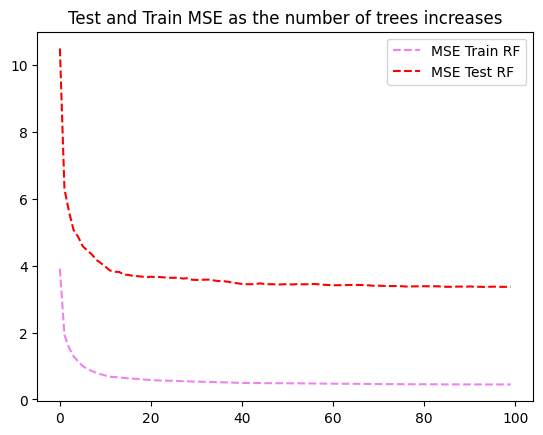

In [ ]:
plt.plot(range(n_estimators), mse_train_seq_rf, label='MSE Train RF', c='violet', ls="--")
plt.plot(range(n_estimators), mse_test_seq_rf, label='MSE Test RF', c='red', ls="--")

plt.legend()
plt.title("Test and Train MSE as the number of trees increases")
plt.show()

## CV Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'bootstrap': [True, False]
}

# Create RandomizedSearchCV
grid_search_rf = GridSearchCV(
    random_forest_model,
    param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
)

# Fit the RandomizedSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Make predictions on the training set
y_train_pred_best_rf = best_model_rf.predict(X_train)

# Evaluate the training MSE using the best model
mse_train_rf = mean_squared_error(y_train, y_train_pred_best_rf)
print("Best Model Train MSE:", mse_train_rf)

# Make predictions on the test set
yhat_test_pred_best_rf = best_model_rf.predict(X_test)

# Evaluate the test MSE using the best model
mse_test_rf = mean_squared_error(y_test, yhat_test_pred_best_rf)
print("Best Model Test MSE:", mse_test_rf)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Train MSE: 0.4304439792128406
Best Model Test MSE: 3.3396608095965985


# **Predicting Player Georgios Zervas's Potential**

In [ ]:
# Load the data
Professor_Data = pd.read_excel('/content/drive/MyDrive/MLBA/Zervas_FIFA_Data.xlsx')

# Drop the 'potential' column
Professor_Data = Professor_Data.drop('Potential', axis=1)

# Make predictions with the best model
Professor = best_model_rf.predict(Professor_Data)


In [ ]:
print(Professor)

[87.51]
